In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('vendas_tratado.xlsx')

<Figure size 1000x500 with 0 Axes>

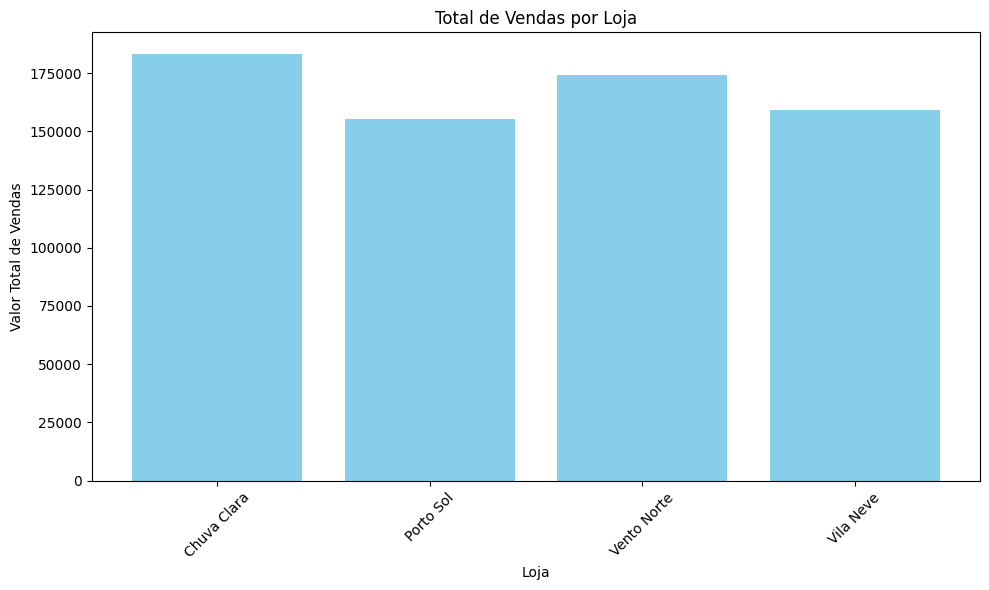

In [21]:
#1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido

plt.figure(figsize=(10, 5))

vendas_por_loja = df.groupby('loja')['valor_venda'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(vendas_por_loja['loja'], vendas_por_loja['valor_venda'], color='skyblue')
plt.title('Total de Vendas por Loja')
plt.xlabel('Loja')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

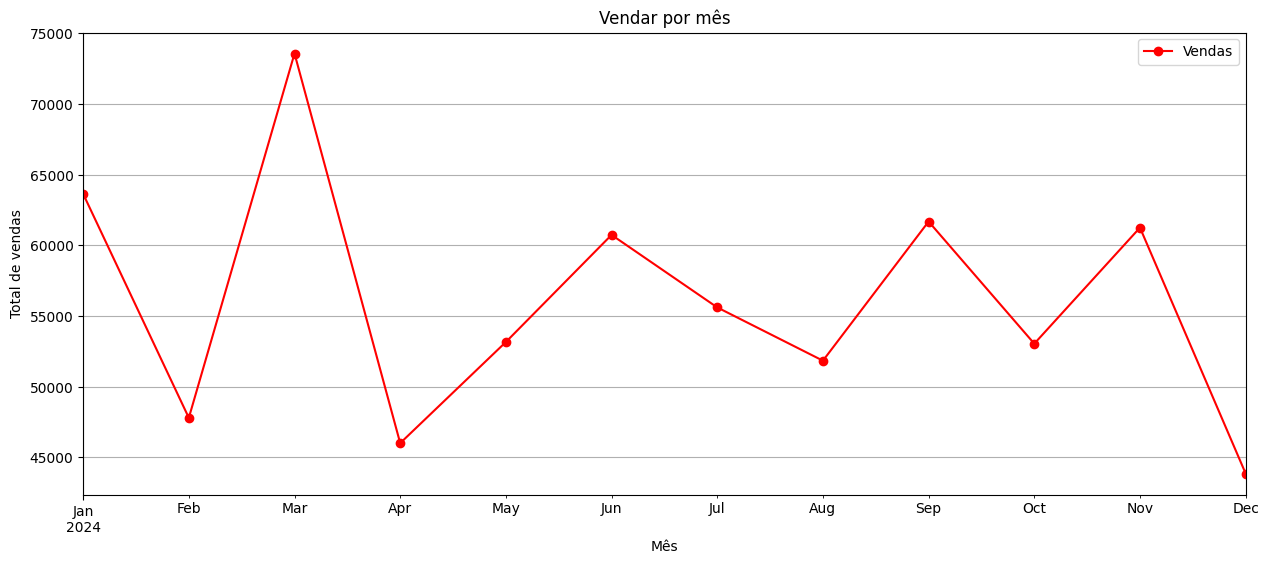

In [22]:
#2 & 3. Evolução mensal de vendas - Identificar sazonalidades e picos mensais.

plt.figure(figsize=(15,6))

df['ano_mes'] = df['data'].dt.to_period('M')

vendas_por_mes = df.groupby('ano_mes')['valor_venda'].sum()

vendas_por_mes.plot(marker='o', linestyle='-', color='red', label="Vendas")

plt.title("Vendar por mês")

plt.xlabel("Mês")

plt.ylabel("Total de vendas")
plt.grid(True)
plt.legend()

plt.show()

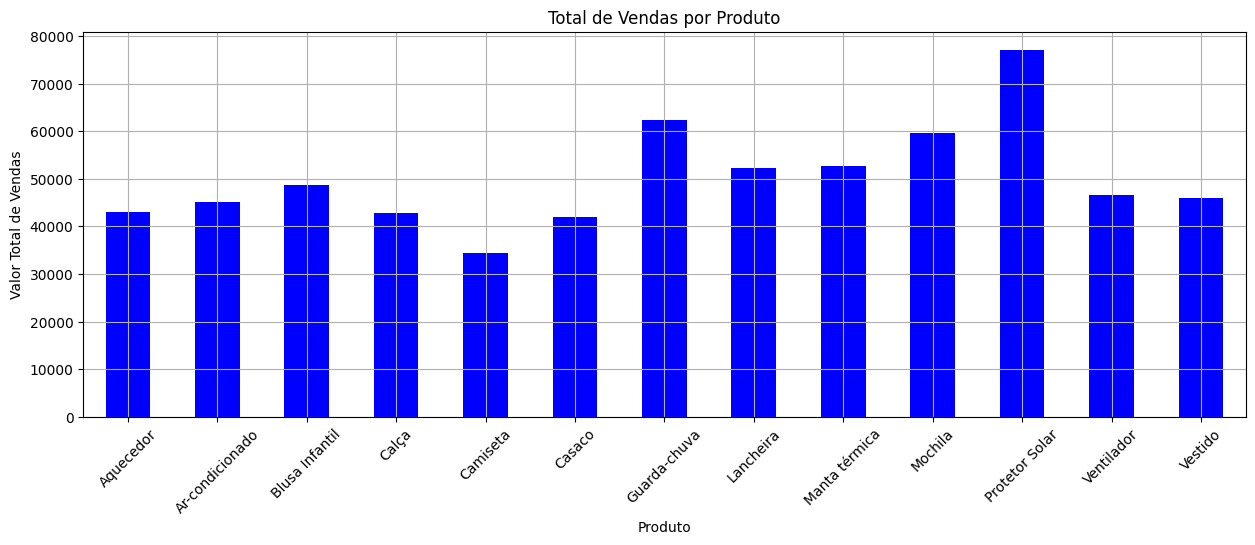

In [29]:
# 4. Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no caixa.

vendas_por_produto = df.groupby('produto')['valor_venda'].sum()

plt.figure(figsize=(15,5))

vendas_por_produto.plot(kind='bar', color='blue')

plt.title('Total de Vendas por Produto')
plt.xlabel('Produto')
plt.grid(True)
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.show()

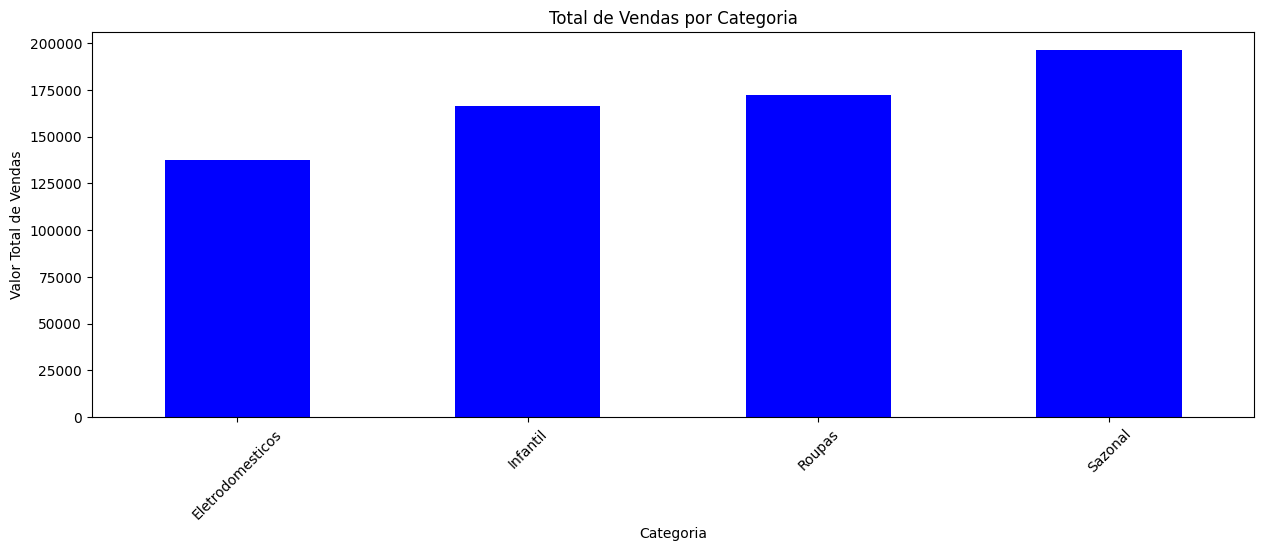

In [26]:
# 5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.


vendas_por_categoria = df.groupby('categoria')['valor_venda'].sum()


plt.figure(figsize=(15,5))

vendas_por_categoria.plot(kind='bar', color='blue')

plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.show()


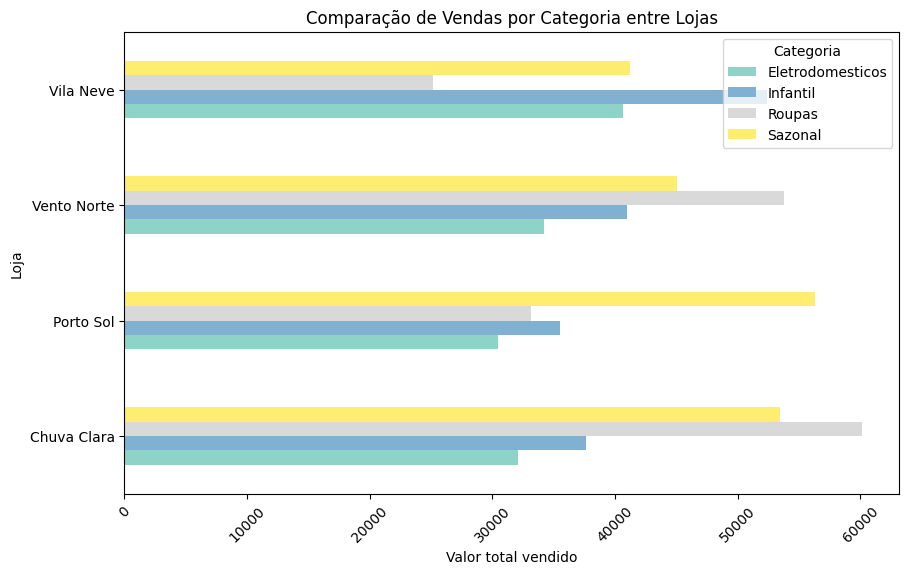

In [37]:
# 6 & 7. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco diferente entre as lojas, com base nas categorias que mais vendem.

comparacao = df.groupby(['loja', 'categoria'])['valor_venda'].sum().reset_index()

tabela_pivot = comparacao.pivot(index='loja', columns='categoria', values='valor_venda').fillna(0)

tabela_pivot.plot(kind='barh', figsize=(10, 6), colormap='Set3')

plt.title('Comparação de Vendas por Categoria entre Lojas')
plt.xlabel('Valor total vendido')
plt.ylabel('Loja')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.show()